## Codio Activity 6.6: Applying K-Means in Python

**Expected Time: 60 Minutes**

**Total Points: 10 Points**

This assignment walks through an initial centroid assignment using a random selection strategy.  After the initial centroids are selected, the within cluster sum of squares is computed.  Once the sum of squares for each cluster center and observation are determined, a label is chosen based on the smallest sum of squares.  Finally, within each of these clusters the centers are updated based on the within cluster mean.  Formally, the KMeans objective function is:

$${\displaystyle {\underset {\mathbf {S} }{\operatorname {arg\,min} }}\sum _{i=1}^{k}\sum _{\mathbf {x} \in S_{i}}\left\|\mathbf {x} -{\boldsymbol {\mu }}_{i}\right\|^{2}={\underset {\mathbf {S} }{\operatorname {arg\,min} }}\sum _{i=1}^{k}|S_{i}|\operatorname {Var} S_{i}}$$

## Index:

- [Problem 1](#Problem-1)
- [Problem 2](#Problem-2)

To compute the norm and argmin we will use `numpy`. 

In [1]:
import numpy as np
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

### The Data

We will use the built in dataset generator from `sklearn` to create a small dataset to demonstrate a simple case of KMeans clustering.  Below, the data are created and plotted.  It seems there are three clusters so we will assume there should be three cluster centers.

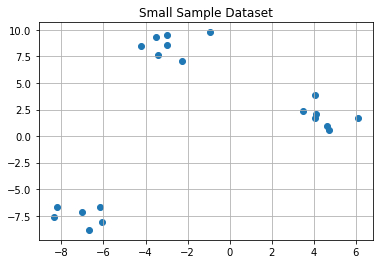

In [2]:
X1, _ = make_blobs(n_samples=20, random_state=42)
plt.scatter(X1[:, 0], X1[:, 1])
plt.title('Small Sample Dataset')
plt.grid();

### Creating a `DataFrame`

Using `pandas`, a `DataFrame` is created to hold the small dataset.  The features are named `X1` and `X2`.  The `DataFrame` is named `df`.

In [3]:
#create DataFrame of samples
df = pd.DataFrame(X1, columns = ['X1', 'X2'])
df.head()

,X1,X2
0,-2.978672,9.556846
1,-4.234115,8.451999
2,-3.522029,9.328533
3,-2.267235,7.101006
4,3.488885,2.348868


### Randomly Selecting Centers

As noted, we will make initial cluster centroid assignments based on a random selection of data from the samples.  Below, the `.sample` method from the DataFrame is used to select three points at random.  These are assigned to the variable `centroids` as a DataFrame.

In [4]:
centroids = df.sample(3, random_state = 11).reset_index(drop = True)
centroids

,X1,X2
0,-2.267235,7.101006
1,-8.207813,-6.683248
2,-6.670764,-8.839780


### Assigning initial centroid values

Now, we select the individual centroid values and assign them as `c1`, `c2`, `c3` below.  

In [5]:
c1 = centroids.iloc[0, :2].values
c2 = centroids.iloc[1, :2].values
c3 = centroids.iloc[2, :2].values

In [6]:
centroids.iloc[0, :2]

X1   -2.267235
X2    7.101006
Name: 0, dtype: float64

In [7]:
centroids.iloc[0, :2].values

array([-2.26723535,  7.10100588])

In [8]:
c1

array([-2.26723535,  7.10100588])

### Inner cluster sum of squares

To find the inter cluster variance, we can use the `np.linalg.norm` function.  This finds the distances squared from each of the cluster centers to each datapoint.  These distances are assembled into a DataFrame called `dist_df` and the three columns represent the three cluster centers.  Note that there should be a value of zero in each column because the centers were chosen as datapoints from the dataset.  

In [9]:
d1 = np.linalg.norm(df.iloc[:, :2] - c1, axis = 1)**2
d2 = np.linalg.norm(df.iloc[:, :2] - c2, axis = 1)**2
d3 = np.linalg.norm(df.iloc[:, :2] - c3, axis = 1)**2

In [10]:
dist_df = pd.DataFrame(np.array([d1]).T, columns = ['d1'])
dist_df['d2'] = pd.DataFrame(np.array([d2]).T, columns = ['d2'])
dist_df['d3'] = pd.DataFrame(np.array([d3]).T, columns = ['d3'])

In [11]:
#dist_df = pd.DataFrame(np.array([d1, d2, d3]).T, columns = ['d1', 'd2', 'd3'])
dist_df

,d1,d2,d3
0,6.537294,291.084588,352.067384
1,5.693799,244.865975,304.942851
2,6.536386,278.333733,340.002135
3,0.000000,225.296131,273.499707
4,55.715742,218.391876,228.404296
5,225.296131,0.000000,7.013149
6,2.592963,259.415173,316.030533
7,85.782948,222.456907,222.790167
8,65.653774,228.237683,235.243327
9,69.142938,219.958929,225.401001


[Back to top](#Index:) 

## Problem 1

### What were the original centers

**5 Points**

In the distance data above, which data point was the original centroid of the first column?  Assign the index of the datapoint as an integer to `ans1` below.

In [12]:
dist_df.index[dist_df['d1'] == 0][0]

3

In [13]:
### GRADED

ans1 = None

# YOUR CODE HERE
ans1 = int(dist_df.index[dist_df['d1'] == 0][0])
#raise NotImplementedError()

# Answer check
print(ans1)
print(type(ans1))

3
<class 'int'>


### Finding the `argmin`

For each of the observations, we want to assign them to the cluster where the inter cluster variance is minimized.  To do so, we can use the `np.argmin` function and apply it across the rows.  Note that this returns a label for which cluster the point will be assigned.  These labels are added to the original DataFrame and the points are plotted.  

In [14]:
#np.argmin(dist_df.values, axis = 1) #finding smallest variance
df['cluster label'] = np.argmin(dist_df.values, axis = 1) #create new column of labels
df.head()

,X1,X2,cluster label
0,-2.978672,9.556846,0
1,-4.234115,8.451999,0
2,-3.522029,9.328533,0
3,-2.267235,7.101006,0
4,3.488885,2.348868,0


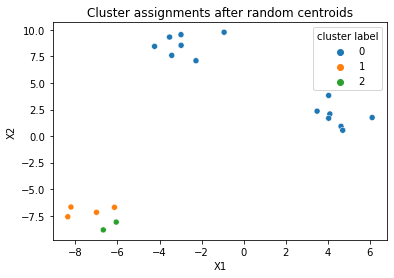

In [15]:
sns.scatterplot(data = df, x = 'X1',y = 'X2', hue = 'cluster label', palette='tab10')
plt.title('Cluster assignments after random centroids');

[Back to top](#Index:) 

## Problem 2

### Initial Cluster Assignments

**5 Points**

Now that the clusters have been assigned, what do you think of the initial assignments?  Did they end up matching with what your intuitive assignments would be?  Assign your solution to `ans2` below as a boolean value, `True` representing if the cluster assignments are "good", `False` if they are "bad". 

In [16]:
### GRADED

ans2 = None

# YOUR CODE HERE
#raise NotImplementedError()

ans2 = False

# Answer check
print(ans2)
print(type(ans2))

False
<class 'bool'>


### Compute new centroids

Using the new labels for the cluster centers, the final step is to update the random centroids based on the averages of each cluster.  One approach is to use the `groupby` method to group by the initial labels and aggregate based on the mean.  Below, we save these as a DataFrame named `new_centers` and plot the updated centroids in the scatterplot as red star markers.  

In [17]:
new_centers = df.groupby('cluster label').mean()

In [18]:
new_centers

,X1,X2
cluster label,,
0,0.769945,5.251557
1,-7.425600,-7.043289
2,-6.363923,-8.470366


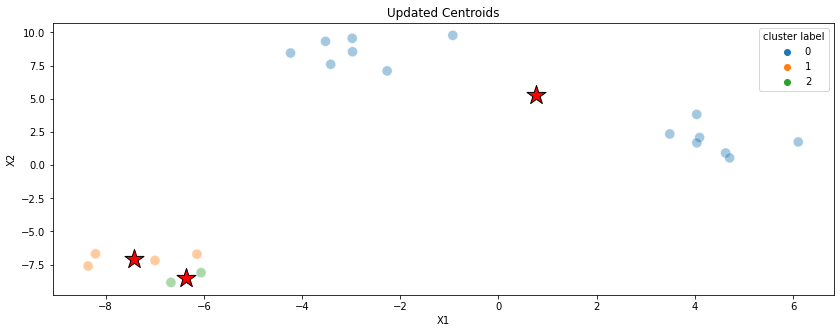

In [19]:
plt.figure(figsize = (14, 5))
sns.scatterplot(data = df, x = 'X1',y = 'X2', hue = 'cluster label', palette='tab10', s = 100, alpha = 0.4)
plt.title('Updated Centroids');
plt.scatter(new_centers['X1'], new_centers['X2'], marker = '*', s = 400, c = 'red', edgecolor = 'black')

### Exploration

In the next assignment you will use a built in `sklearn` estimator to conduct the KMeans clustering algorithm.  If interested try to use the example code above as a guide to repeat the cluster assignments based on these new centroids, label observations, and update the centroids.  Ideally, you would do this either a set number of iterations or until the distance between updated centroids stabalizes from one iteration to the next.

In [20]:
def KMeans(X, centers = 3, iterations = 100):
    #select centers at random
    starting_centers = ''
    #for each iteration
    
        #determine intercluster variance

        #make cluster assignments

        #update centroids

        #repeat
    return ''

In [21]:
def KMeans(X, centers = 3, iterations = 100):
    #select centers at random
    centroids = X.sample(centers, random_state = 11).reset_index(drop = True)
    #for each iteration
    for i in range(0,iterations):
    
        #determine intercluster variance
        for d in range(0, centers):
            dv = np.linalg.norm(X.iloc[:, :2] - centroids.iloc[d, :2].values, axis = 1)**2
            if d == 0:
                dist_df = pd.DataFrame(np.array([dv]).T, columns = ['d'+str(d+1)])
            else:
                dist_df['d'+str(d+1)] = pd.DataFrame(np.array([dv]).T, columns = ['d'+str(d+1)])
                    

        #make cluster assignments
        X['cluster label'+str(i)] = np.argmin(dist_df.values, axis = 1) #create new column of labels

        #update centroids
        centroids = X.groupby('cluster label'+str(i)).mean()
        #repeat
        if i > 0:
            if np.allclose(X['cluster label'+str(i-1)], X['cluster label'+str(i)]):
                break
    return centroids

In [22]:
new_centers = KMeans(df, 3, 20)

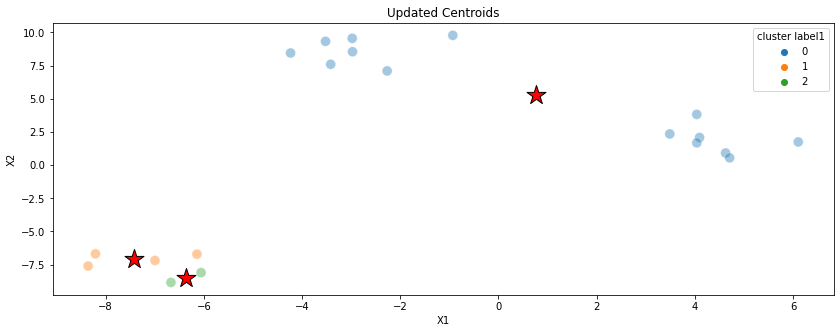

In [23]:
plt.figure(figsize = (14, 5))
sns.scatterplot(data = df, x = 'X1',y = 'X2', hue = 'cluster label1', palette='tab10', s = 100, alpha = 0.4)
plt.title('Updated Centroids');
plt.scatter(new_centers['X1'], new_centers['X2'], marker = '*', s = 400, c = 'red', edgecolor = 'black')

In [24]:
np.allclose(df['cluster label0'], df['cluster label1'])

True

In [25]:
df

,X1,X2,cluster label,cluster label0,cluster label1
0,-2.978672,9.556846,0,0,0
1,-4.234115,8.451999,0,0,0
2,-3.522029,9.328533,0,0,0
3,-2.267235,7.101006,0,0,0
4,3.488885,2.348868,0,0,0
5,-8.207813,-6.683248,1,1,1
6,-2.972615,8.548556,0,0,0
7,4.626382,0.915459,0,0,0
8,4.095496,2.084092,0,0,0
9,4.039240,1.681476,0,0,0
